# This notebook comparing the GAFF1 modelling data with the experimental value, taking the input from clustering.ipynb, in which all the results are in sampling/

In [1]:
import biceps 

import mdtraj as md
import numpy as np
import pandas as pd 
import os, pickle, string, shutil 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

BICePs - Bayesian Inference of Conformational Populations, Version 2.0


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

********* JAX NOT FOUND *********
 PyMBAR can run faster with JAX  
 But will work fine without it   
Either install with pip or conda:
      pip install pybar[jax]     
               OR                
      conda install pymbar       
*********************************


### Prepare NOE Distance

In [2]:
def compute_ensemble_avg_NOE(grouped_files, indices, outdir, verbose=False):
    indices = np_ind_noe
    for i, state in enumerate(grouped_files):
        for j, frame in enumerate(state):
            d = md.compute_distances(md.load(frame), indices) * 10. # convert nm to Å
        data = np.mean(d, axis=0)
        data = data.reshape(1, -1) # Reshape the data to have the shape (1, 8) instead of (8,)
        np.savetxt(f'{outdir}NOE_{i}.txt', data)
        print(f"save model NOE to: {outdir}NOE_{i}.txt ")

In [3]:
import os
import shutil

# Define the root directory
root = 'biceps/'

# Check if the directory exists
if os.path.exists(root):
    # Clear the contents if the directory exists
    shutil.rmtree(root)  # Remove the directory and its contents
    os.makedirs(root)    # Recreate the empty directory
    print(f"All content in '{root}' has been cleared ")
else:
    # Create the directory if it doesn't exist
    os.makedirs(root)
    print(f"'{root}' has been created.")


'biceps/' has been created.


In [5]:
# Store the Modeling and Experiment data NEO  
data_dir = 'biceps/data/'
biceps.toolbox.mkdir(data_dir)

# Define the atom pair indices for noe distance 
atom_indices = [
    [16, 20],
    [16, 21],
    [17, 20],
    [17, 21],
    [37, 55],
    [37, 56],
    [38, 55],
    [38, 56],
]

with open(f"{data_dir}atom_indice_noe.txt", 'w') as file:
    for pair in atom_indices:
        line = f"{pair[0]} {pair[1]}\n"
        file.write(line)
#recorded experimental state, and experimental NOE distance
exp_state_noe = [  
    [1, 3.5],
    [1, 3.5],
    [1, 3.5],
    [1, 3.5],
    [2, 3.2],
    [2, 3.2],
    [2, 3.2],
    [2, 3.2],
]

with open(f"{data_dir}noe_distance.txt", 'w') as file:
    for pair in exp_state_noe:
        line = f"{pair[0]} {pair[1]}\n"
        file.write(line)

In [6]:
outdir = 'biceps/_NOE/'
biceps.toolbox.mkdir(outdir)


# Create a grouped_file list 
grouped_files = []
ncluster = 8
for cluster in range(ncluster):
    sample = [f"sampling/sample_state_0_cluster{cluster}_whole.pdb"]
    grouped_files.append(sample)
#print(grouped_files)

# Create a index file for atomic indice and noe distance 
gmx_ind_noe = np.loadtxt(f"{data_dir}atom_indice_noe.txt")
#print(gmx_ind_noe)
if (type(gmx_ind_noe) != np.ndarray and type(gmx_ind_noe) != list):
    print(type(gmx_ind_noe))
np_ind_noe = gmx_ind_noe -1 #indices of numpy is indices of gmx - 1 
#print(np_ind_noe)
indices = np_ind_noe

# Compute the average NOE distance of samplings in each states (cluters) 
compute_ensemble_avg_NOE(grouped_files, indices, outdir)    

model_data_NOE = np.array([np.loadtxt(file) for file in biceps.toolbox.get_files(f"{outdir}*.txt")])
print(model_data_NOE)
exp_data_NOE = np.loadtxt(f"{data_dir}noe_distance.txt")

save model NOE to: biceps/_NOE/NOE_0.txt 
save model NOE to: biceps/_NOE/NOE_1.txt 
save model NOE to: biceps/_NOE/NOE_2.txt 
save model NOE to: biceps/_NOE/NOE_3.txt 
save model NOE to: biceps/_NOE/NOE_4.txt 
save model NOE to: biceps/_NOE/NOE_5.txt 
save model NOE to: biceps/_NOE/NOE_6.txt 
save model NOE to: biceps/_NOE/NOE_7.txt 
[[3.32442904 3.07302737 3.36151242 3.17932057 4.54374695 4.66081858
  4.68867874 4.63987255]
 [3.30733013 3.25591946 3.19453311 3.2768836  3.1568234  3.15107417
  3.09801841 3.21881223]
 [3.25338817 3.20180655 3.22053313 3.24909854 4.62918711 4.70419884
  4.65390301 4.5860405 ]
 [4.72389841 4.72670221 4.72256947 4.6465435  3.16633916 3.15873051
  3.07022405 3.19272375]
 [4.61372805 4.74124002 4.68431282 4.68868256 4.60286951 4.66119766
  4.68470287 4.68834782]
 [4.6777277  4.74090195 4.72529793 4.69730425 3.19014311 3.14391875
  3.10423684 3.21259785]
 [4.70101929 4.71106243 4.73072386 4.65924644 4.63625956 4.71623516
  4.6736021  4.6469965 ]
 [3.04023433 

In [7]:
outdir = 'biceps/NOE/'
biceps.toolbox.mkdir(outdir)

prep = biceps.Preparation(nstates=8, outdir=outdir) # nstate = number of cluster for sampling 
prep.prepare_noe(exp_data_NOE, model_data_NOE, indices = np_ind_noe, verbose=True)

   exp     model  restraint_index  atom_index1  atom_index2
0  3.5  3.324429                1           15           19
1  3.5  3.073027                1           15           20
2  3.5  3.361512                1           16           19
3  3.5  3.179321                1           16           20
4  3.2  4.543747                2           36           54
5  3.2  4.660819                2           36           55
6  3.2  4.688679                2           37           54
7  3.2  4.639873                2           37           55
Writing biceps/NOE/0.noe as pickle...
   exp     model  restraint_index  atom_index1  atom_index2
0  3.5  3.307330                1           15           19
1  3.5  3.255919                1           15           20
2  3.5  3.194533                1           16           19
3  3.5  3.276884                1           16           20
4  3.2  3.156823                2           36           54
5  3.2  3.151074                2           36           55
6 

In [8]:
input_data = prep.to_sorted_list()
print(input_data)

[['biceps/NOE/0.noe'], ['biceps/NOE/1.noe'], ['biceps/NOE/2.noe'], ['biceps/NOE/3.noe'], ['biceps/NOE/4.noe'], ['biceps/NOE/5.noe'], ['biceps/NOE/6.noe'], ['biceps/NOE/7.noe']]


In [9]:
pd.read_pickle(input_data[0][0])

,exp,model,restraint_index,atom_index1,atom_index2
0,3.5,3.324429,1,15,19
1,3.5,3.073027,1,15,20
2,3.5,3.361512,1,16,19
3,3.5,3.179321,1,16,20
4,3.2,4.543747,2,36,54
5,3.2,4.660819,2,36,55
6,3.2,4.688679,2,37,54
7,3.2,4.639873,2,37,55


### Prepare Energy

In [12]:
# Convert the Probability into Reduced Free Energy 
P = np.loadtxt('clusters_probability.dat') / 100
print(P, P.sum())
k_B = 1.38e-23  # Boltzmann constant (j/K)
T = 300  # (K)
energies = -np.log(P) # Calculate reduced free energy E using the equation E = ln(P) (KT)
energies -= energies.min() # set ground state to zero, just in case
print(f"Reduced Free Energy F: {energies} KT")

####### Data and Output Directories #######

# REQUIRED: specify directory of input data (BICePs readable format)
input_data = biceps.toolbox.sort_data('biceps/NOE/')

# REQUIRED: specify outcome directory of BICePs sampling
outdir = 'biceps/results/'
# Make a new directory if we have to
biceps.toolbox.mkdir(outdir)

[0.16950402 0.23838808 0.14574271 0.09979501 0.06380931 0.07414629
 0.04637268 0.16224189] 1.0
Reduced Free Energy F: [0.34102326 0.         0.49205711 0.87078175 1.31800084 1.16785987
 1.63718941 0.38481158] KT


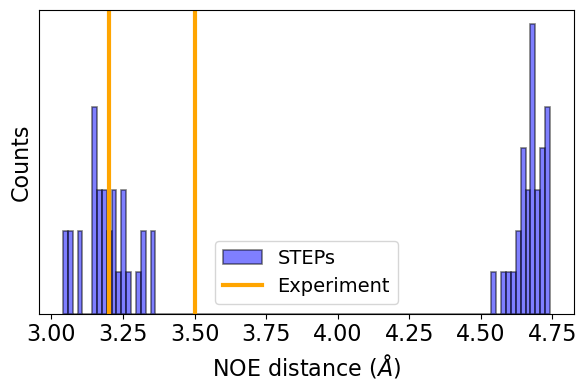

In [14]:
%matplotlib inline

fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0,0])
data1 = pd.concat([pd.read_pickle(i) for i in biceps.toolbox.get_files('biceps/NOE/*.noe')])
ax1 = data1["model"].plot.hist(alpha=0.5, bins=100, edgecolor='black', linewidth=1.2, color="b", label="STEPs")

# Ensure each experimental value is plotted as a separate vertical line
for exp_value in set(data1["exp"].to_numpy()):
    ax1.axvline(exp_value, c="orange", linewidth=3, label="Experiment")

handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), fontsize=14)
ax1.set_xlabel(r"NOE distance ($\AA$)", size=16)
ax1.set_ylabel("Counts", size=16)
ax1.axes.get_yaxis().set_ticks([])
ticks = [ax1.xaxis.get_minor_ticks(), ax1.xaxis.get_major_ticks()]
xmarks = [ax1.get_xticklabels()]
for k in range(0, len(ticks)):
    for tick in ticks[k]:
        tick.label1.set_fontsize(16)  # Corrected to tick.label1
for k in range(0, len(xmarks)):
    for mark in xmarks[k]:
        mark.set_fontsize(16)
        mark.set_rotation(0)
fig.tight_layout()
fig.savefig('biceps/histogram_of_NOE_observables.png', transparent=True, dpi=600)
plt.show()

In [15]:
nsteps = 5e6 
burn = 1e5
n_lambdas = 2
lambda_values = np.linspace(0.0, 1.0, n_lambdas)

In [16]:
#pd.DataFrame(biceps.get_restraint_options())
options = biceps.get_restraint_options(input_data)
pd.DataFrame(options)

,ref,sigma,use_global_ref_sigma,extension,weight,file_fmt,log_normal,gamma
0,uniform,"[0.05, 20.0, 1.02]",True,noe,1,pickle,False,"[0.2, 10.0, 1.01]"


In [17]:
# Change NOE reference potential from uniform to exponential
#options[0]["gamma"] = [1.0, 2.0, np.e] # change the gamma to np.e to cancel out it inpact

options[0]

{'ref': 'uniform',
 'sigma': [0.05, 20.0, 1.02],
 'use_global_ref_sigma': True,
 'extension': 'noe',
 'weight': 1,
 'file_fmt': 'pickle',
 'log_normal': False,
 'gamma': [0.2, 10.0, 1.01]}

In [18]:
# Multiprocess trajectories for each $\lambda$-value with a built-in decorator
@biceps.multiprocess(iterable=lambda_values)
def mp_lambdas(lam):
    ensemble = biceps.Ensemble(lam, energies)
    ensemble.initialize_restraints(input_data, options)
    sampler = biceps.PosteriorSampler(ensemble)
    sampler.sample(nsteps=nsteps, burn=burn, print_freq=1000, verbose=False)
    filename = os.path.join(outdir,'traj_lambda%2.2f.npz'%(lam))
    sampler.traj.process_results(filename)
    biceps.toolbox.save_object(sampler, filename.replace(".npz", ".pkl"))

Number of CPUs: 8
Number of processes: 2


 98%|█████████▊| 5000000/5100000.0 [04:18<00:05, 19311.83it/s]



Accepted 67.84976470588235 % 


Accepted [ ...Nuisance paramters..., state] %
Accepted [47.31333333 47.31333333 20.53643137] % 



 98%|█████████▊| 5000000/5100000.0 [04:20<00:05, 19211.44it/s]



Accepted 63.60992156862745 % 


Accepted [ ...Nuisance paramters..., state] %
Accepted [47.21578431 47.21578431 16.39413725] % 



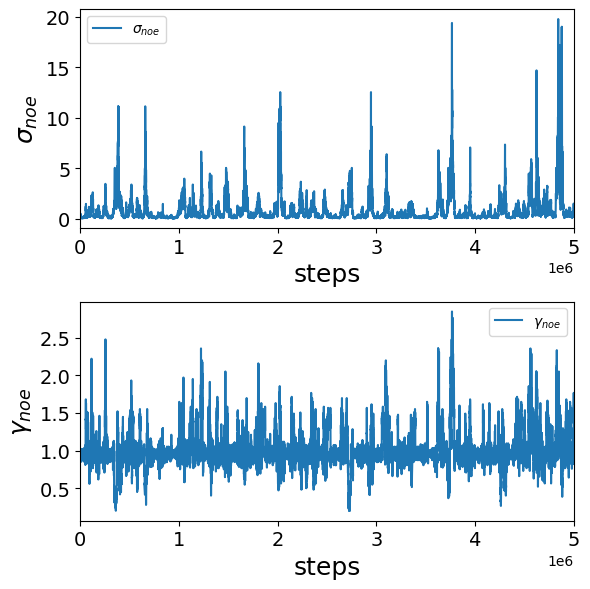

In [19]:
convergence = biceps.Convergence(filename=os.path.join(outdir,"traj_lambda1.00.npz"), outdir=outdir)
convergence.plot_traces(figname="traces.pdf", xlim=(0, nsteps))

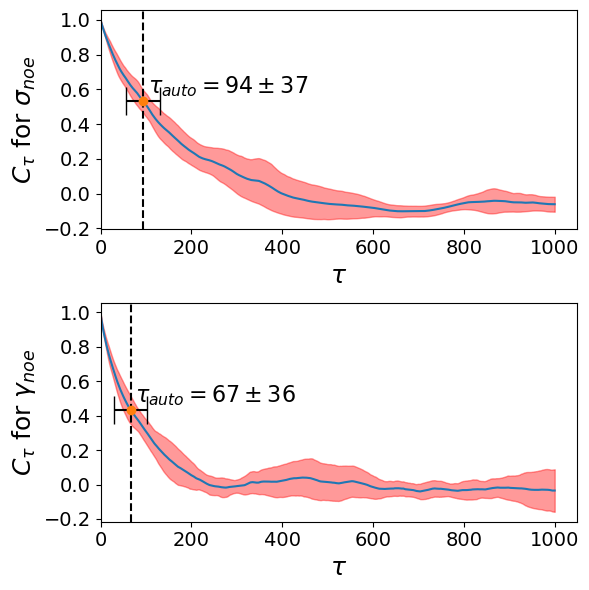

In [20]:
convergence.get_autocorrelation_curves(method="block-avg-auto", maxtau=1000, nblocks=5)

BICePs Scores = [ 0.         -0.22186763]


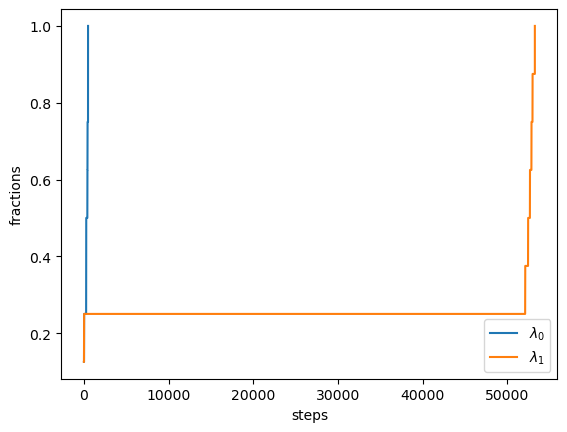

In [21]:
############ MBAR and Figures ###########
%matplotlib inline
# Let's do analysis using MBAR algorithm and plot figures
A = biceps.Analysis(outdir, nstates=len(energies))
biceps.toolbox.save_object(A, "analysis_object.pkl")
#pops = A.P_dP[:,n_lambdas-1]
pops, BS = A.P_dP, A.f_df
print(f"BICePs Scores = {BS[:,0]}")

In [22]:
import pickle
with open("analysis_object.pkl", 'rb') as f:
    A = pickle.load(f)

Figure(1400x800)


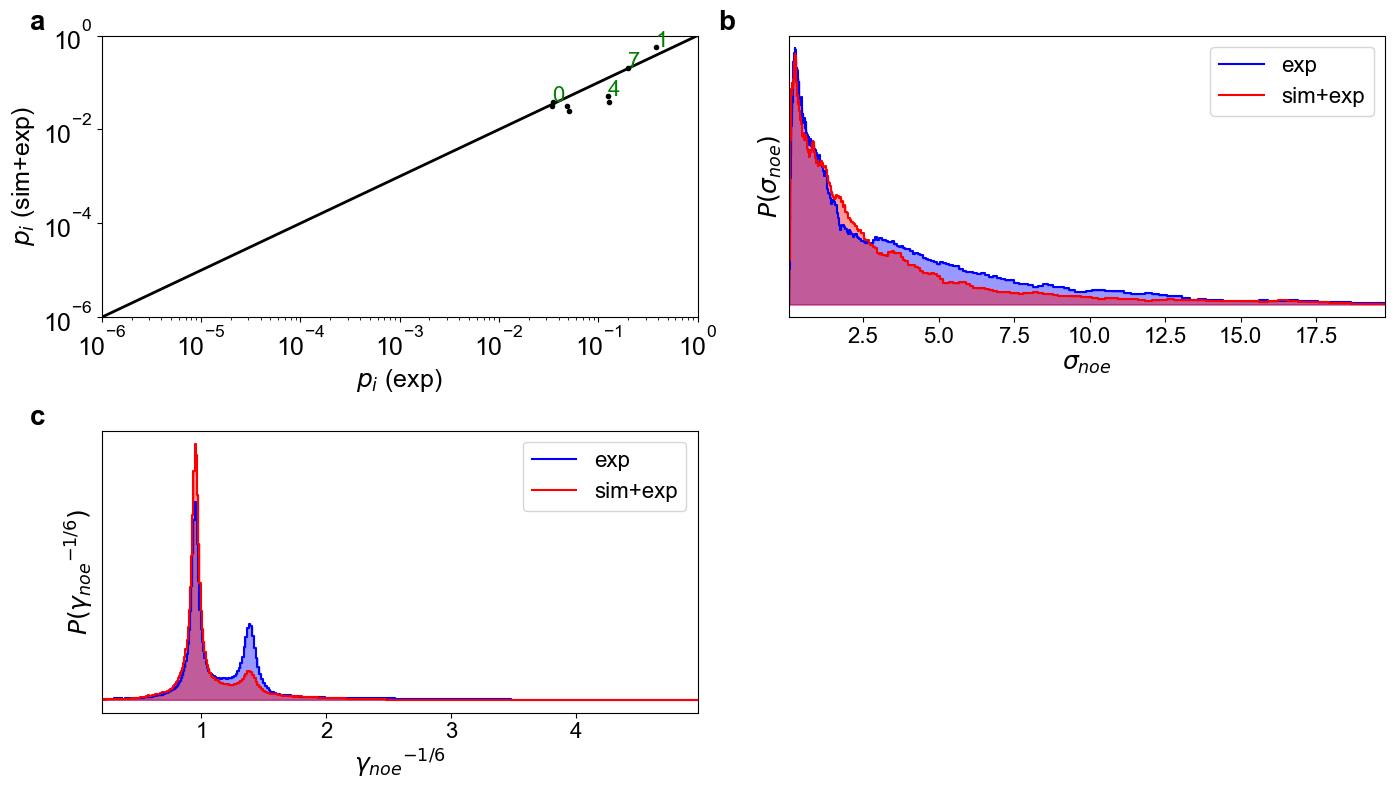

In [23]:
import os
import matplotlib.pyplot as plt

# Assuming A is your analysis object
pops, BS = A.P_dP, A.f_df
pops0, pops1 = pops[:, 0], pops[:, len(lambda_values) - 1]

legend_fontsize = 16
label_fontsize = 18


# Plot the figure with 'step' plot type
fig = A.plot(plottype="step", figname="BICePs_.pdf", figsize=(14, 8),
             label_fontsize=label_fontsize, legend_fontsize=legend_fontsize)
print(fig)
ax = fig.axes[0]

# Update tick label font size using tick_params
ax.tick_params(axis='both', which='major', labelsize=label_fontsize)
ax.tick_params(axis='both', which='minor', labelsize=label_fontsize)


output_path = os.path.join(outdir, "BICePs.png")
fig.savefig(output_path, transparent=True, dpi=600)
plt.show()



In [24]:
mlp = pd.concat([A.get_max_likelihood_parameters(model=i) for i in range(len(lambda_values))])
mlp.reset_index(inplace=True, drop=True)
mlp

,sigma_noe,gamma_noe
0,0.248647,0.953862
1,0.243772,0.953862


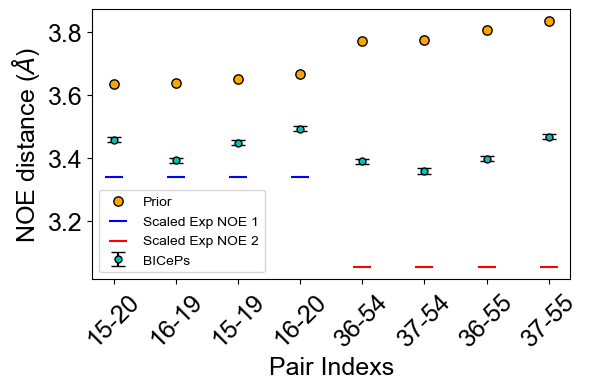

In [28]:
import uncertainties as u

pops_std = A.P_dP[:,-1]

# NOTE: Get Prior MDS populations
prior_pops = np.loadtxt('clusters_probability.dat') / 100
prior_pops /= prior_pops.sum()

noe = [pd.read_pickle(i) for i in biceps.toolbox.get_files(f"biceps/NOE/*.noe")]
#  Get the ensemble average observable
noe_Exp = noe[0]["exp"].to_numpy()
noe_model = [i["model"].to_numpy() for i in noe]

noe_prior = np.array([w*noe_model[i] for i,w in enumerate(prior_pops)]).sum(axis=0)
noe_reweighted = np.array([u.ufloat(w, pops_std[i])*noe_model[i] for i,w in enumerate(pops[:,n_lambdas-1])]).sum(axis=0)

distance_labels = [f"{int(row[1]['atom_index1'])}-{int(row[1]['atom_index2'])}" for row in noe[0].iterrows()]
distance_label_indices = np.array([[row[1]['atom_index1'], row[1]['atom_index2']] for row in noe[0].iterrows()])

# Plot NOE data
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(1, 1)
ax1 = plt.subplot(gs[0, 0])
data = []

for i in range(len(noe_reweighted)):
    data.append({
        "index": i,
        "reweighted noe": noe_reweighted[i],
        "prior noe": noe_prior[i],
        "exp noe": noe_Exp[i],
        "scaled exp noe": noe_Exp[i] * mlp['gamma_noe'].to_numpy()[-1],
        "label": distance_labels[i]
    })

data1 = pd.DataFrame(data)
data1 = data1.sort_values(["prior noe"]).reset_index()

reweighted_vals = np.array([val.nominal_value for val in data1["reweighted noe"].to_numpy()])
reweighted_std = np.array([val.std_dev for val in data1["reweighted noe"].to_numpy()])

ax1.scatter(x=data1["label"].to_numpy(), y=data1["prior noe"].to_numpy(),
            s=45, color="orange", label="Prior", edgecolor='black')
# First Exp NOE
#ax1.scatter(x=data1["label"].to_numpy()[:4], y=data1["exp noe"].to_numpy()[:4],
#            s=150, marker="*", color="b", label="Exp NOE 1")
ax1.scatter(x=data1["label"].to_numpy()[:4], y=data1["scaled exp noe"][:4].to_numpy(),
            s=150, marker="_", color="b", label="Scaled Exp NOE 1")
# Second Exp NOE
#ax1.scatter(x=data1["label"].to_numpy()[4:9], y=data1["exp noe"].to_numpy()[4:9],
#            s=150, marker="*", color="r", label="Exp NOE 2")
ax1.scatter(x=data1["label"].to_numpy()[4:9], y=data1["scaled exp noe"].to_numpy()[4:9],
            s=150, marker="_", color="r", label="Scaled Exp NOE 2")

ax1.errorbar(x=data1['label'].to_numpy(), y=reweighted_vals,
             yerr=reweighted_std, fmt="o", capsize=5,
             markersize=5, markerfacecolor="c", label="BICePs",
             ecolor="k", markeredgecolor='black')

ax1.legend(fontsize=10)
ax1.set_ylabel(r"NOE distance ($\AA$)", size=18)
ax1.set_xlabel(r"Pair Indexs", size=18)

# Customize ticks and labels
ax1.tick_params(axis='x', labelsize=18, rotation=45)
ax1.tick_params(axis='y', labelsize=18)

fig.tight_layout()
fig.savefig(f"{outdir}/reweighted_NOE_observables.png",transparent=True, dpi=500)
plt.show()

In [29]:
print(options[0])

{'ref': 'uniform', 'sigma': [0.05, 20.0, 1.02], 'use_global_ref_sigma': True, 'extension': 'noe', 'weight': 1, 'file_fmt': 'pickle', 'log_normal': False, 'gamma': [0.2, 10.0, 1.01]}


Prior Pops: [0.16950402 0.23838808 0.14574271 0.09979501 0.06380931 0.07414629
 0.04637268 0.16224189]
Pops1: [0.037748   0.57768363 0.0319308  0.03113453 0.05099867 0.02434426
 0.03806976 0.20809035]


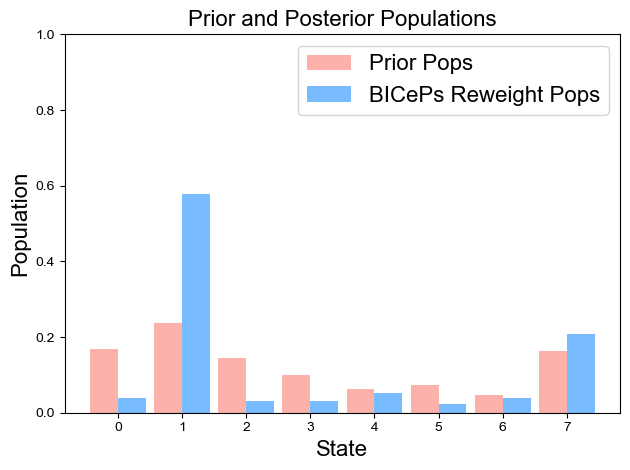

In [30]:
# After you have called on A = biceps.Analysis(#inputs)
pops, BS = A.P_dP, A.f_df
pops0,pops1 = pops[:,0], pops[:,len(lambda_values)-1]

# NOTE: Get Prior MDS populations
prior_pops = np.loadtxt('clusters_probability.dat') / 100
prior_pops /= prior_pops.sum()

# Print values of each column
print("Prior Pops:", prior_pops)
print("Pops1:", pops1)

n_bars = 8
bar_width = 0.5
interval = 0.15
indices = np.arange(n_bars) * (2*bar_width + interval)

fig, ax = plt.subplots()

# Plot prior_pops
ax.bar(indices, height=prior_pops, width=bar_width, label='Prior Pops', alpha=0.6, color='salmon')

# Plot pops1
ax.bar(indices + bar_width, height=pops1, width=bar_width, label='BICePs Reweight Pops', alpha=0.6, color='dodgerblue')

# Add labels and title
ax.set_xlabel('State', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
ax.set_ylim(0, 1)
ax.set_title('Prior and Posterior Populations', fontsize=16)
ax.legend(fontsize=16)

# Set x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])

fig.tight_layout()

# Save the plot
fig.savefig(f"{outdir}/prior_reweight_population.png", transparent=True, dpi=500)

# Show the plot
plt.show()

Prior Pops: [0.16950402 0.23838808 0.14574271 0.09979501 0.06380931 0.07414629
 0.04637268 0.16224189]
Pops1: [0.037748   0.57768363 0.0319308  0.03113453 0.05099867 0.02434426
 0.03806976 0.20809035]


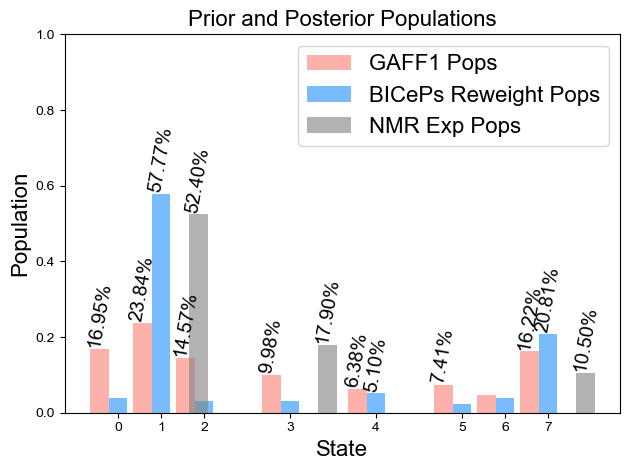

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already created an instance of the Analysis class
# A = biceps.Analysis(#inputs)
pops, BS = A.P_dP, A.f_df
pops0, pops1 = pops[:, 0], pops[:, len(lambda_values) - 1]

# Load and normalize prior populations
prior_pops = np.loadtxt('clusters_probability.dat') / 100
prior_pops /= prior_pops.sum()

# Print values of each column
print("Prior Pops:", prior_pops)
print("Pops1:", pops1)

n_bars = 8
bar_width = 0.5
interval = 0.15

# Create custom indices to create larger space between state 2 and state 3
indices = np.array([0, 1, 2, 4, 6, 8, 9, 10]) * (2 * bar_width + interval)

fig, ax = plt.subplots()

# Plot prior_pops
bars_prior = ax.bar(indices, height=prior_pops, width=bar_width, label='GAFF1 Pops', alpha=0.6, color='salmon')

# Plot pops1
bars_pops1 = ax.bar(indices + bar_width, height=pops1, width=bar_width, label='BICePs Reweight Pops', alpha=0.6, color='dodgerblue')

# Add a third column manually for state 2 and state 3
third_column_values = [0, 0.524, 0, 0.179, 0, 0, 0, 0.105]  # Only state 2 and state 3 have values
bars_third = ax.bar(indices + 3 * bar_width, height=third_column_values, width=bar_width, label='NMR Exp Pops', alpha=0.6, color='grey')

# Add labels and title
ax.set_xlabel('State', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
ax.set_ylim(0, 1)
ax.set_title('Prior and Posterior Populations', fontsize=16)
ax.legend(fontsize=16)

# Set x-axis ticks and labels
ax.set_xticks(indices + bar_width)
ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])

# Annotate the bars with percentage values
for bar in bars_prior:
    height = bar.get_height()
    if height > 0.05:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom', fontsize=14, rotation=80)

for bar in bars_pops1:
    height = bar.get_height()
    if height > 0.05:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom', fontsize=14, rotation=80)

for bar in bars_third:
    height = bar.get_height()
    if height > 0:  # Only label the bars with height greater than 0
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom', fontsize=14, rotation=80)

fig.tight_layout()

# Save the plot
fig.savefig(f"{outdir}/prior_reweight_population.png", transparent=True, dpi=500)

# Show the plot
plt.show()
